# Projeto 01 - Credit Scoring para Concessão de Crédito

## Etapa 1 CRISP - DM: Entendimento do negócio

Como primeira etapa do CRISP-DM, vamos entender do que se trata o negócio, e quais os objetivos. 

Este é um problema de concessão de cartões de crédito, publicado no [Kaggle](https://www.kaggle.com/), uma plataforma que promove desafios de ciência de dados, oferecendo prêmios em dinheiro para os melhores colocados. O link original está [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).  
  
Essa é uma base de proponentes de cartão de crédito, nosso objetivo é construir um modelo preditivo para identificar o risco de inadimplência (tipicamente definida pela ocorrência de um atraso maior ou igual a 90 em um horizonte de 12 meses) através de variáveis que podem ser observadas na data da avaliação do crédito (tipicamente quando o cliente solicita o cartão).

Atividades do CRISP-DM:

- Objetivos do negócio

Note que o objetivo aqui é que o modelo sirva o mutuário (o cliente) para que avalie suas próprias decisões, e não a instituição de crédito.
- Objetivos da modelagem

O objetivo está bem definido: desenvolver o melhor modelo preditivo de modo a auxiliar o mutuário a tomar suas próprias decisões referentes a crédito.
  
Nessa etapa também se avalia a situação da empresa/segmento/assunto de modo a se entender o tamanho do público, relevância, problemas presentes e todos os detalhes do processo gerador do fenômeno em questão, e portanto dos dados.

Também é nessa etapa que se constrói um planejamento do projeto.

## Etapa 2 Crisp-DM: Entendimento dos dados
A segunda etapa é o entendimento dos dados. Foram fornecidas 15 variáveis mais a variável resposta (em negrito na tabela). O significado de cada uma dessas variáveis se encontra na tabela.

#### Dicionário de dados

Os dados estão dispostos em uma tabela com uma linha para cada cliente, e uma coluna para cada variável armazenando as características desses clientes. Colocamos uma cópia o dicionário de dados (explicação dessas variáveis) abaixo neste notebook:

| Variable Name            | Description                                         | Tipo  |
| ------------------------ |:---------------------------------------------------:| -----:|
| sexo| M = 'Masculino'; F = 'Feminino' |M/F|
| posse_de_veiculo| Y = 'possui'; N = 'não possui' |Y/N|
| posse_de_imovel| Y = 'possui'; N = 'não possui' |Y/N|
| qtd_filhos| Quantidade de filhos |inteiro|
| tipo_renda|Tipo de renda (ex: assaliariado, autônomo etc) | texto |
| educacao| Nível de educação (ex: secundário, superior etc) |texto|
| estado_civil | Estado civil (ex: solteiro, casado etc)| texto |
| tipo_residencia | tipo de residência (ex: casa/apartamento, com os pais etc) | texto |
| idade | idade em anos |inteiro|
| tempo de emprego | tempo de emprego em anos |inteiro|
| possui_celular | Indica se possui celular (1 = sim, 0 = não) |binária|
| possui_fone_comercial | Indica se possui telefone comercial (1 = sim, 0 = não) |binária|
| possui_fone | Indica se possui telefone (1 = sim, 0 = não) |binária|
| possui_email | Indica se possui e-mail (1 = sim, 0 = não) |binária|
| qt_pessoas_residencia | quantidade de pessoas na residência |inteiro|
| **mau** | indicadora de mau pagador (True = mau, False = bom) |binária|





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [2]:
# Imports

# Manipulação de dados
import pandas as pd

# Visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt


# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark --iversions

sklearn   : 1.0.2
seaborn   : 0.11.2
matplotlib: 3.5.2
pandas    : 1.4.4



#### Carregando os dados

In [4]:
# Amostra de dados e shape
df = pd.read_csv('demo_01.csv')
print ("Número de linhas e colunas da tabela: {}".format(df.shape))

df.head()

Número de linhas e colunas da tabela: (16650, 16)


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição das variáveis. 

In [5]:
# Descrevando os atributos numéricos
df.select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
qtd_filhos,16650.0,0.433153,0.739395,0.000000,0.000000,0.000000,1.000000,14.000000
idade,16650.0,44.319513,11.228837,22.030137,34.873973,43.493151,53.410959,68.909589
tempo_emprego,16650.0,-161.416446,376.843912,-1000.665753,1.183562,4.691781,9.088356,42.906849
possui_celular,16650.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
possui_fone_comercial,16650.0,0.225225,0.417743,0.000000,0.000000,0.000000,0.000000,1.000000
possui_fone,16650.0,0.295676,0.456360,0.000000,0.000000,0.000000,1.000000,1.000000
possui_email,16650.0,0.088889,0.284592,0.000000,0.000000,0.000000,0.000000,1.000000
qt_pessoas_residencia,16650.0,2.211892,0.903755,1.000000,2.000000,2.000000,3.000000,15.000000


In [6]:
# Calcula a frequência e a média dos maus pagadores
print(df['mau'].value_counts())
print("\nTaxa de inadimplentes:")
print(df['mau'].mean())

False    16260
True       390
Name: mau, dtype: int64

Taxa de inadimplentes:
0.023423423423423424


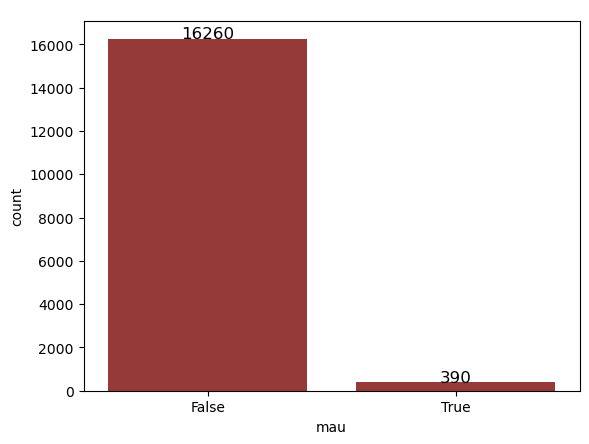

In [7]:
var = 'mau'
grafico_barras = sns.countplot(x=var, data=df, color ='brown')

for p in grafico_barras.patches:
    grafico_barras.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', color='black', size=12)

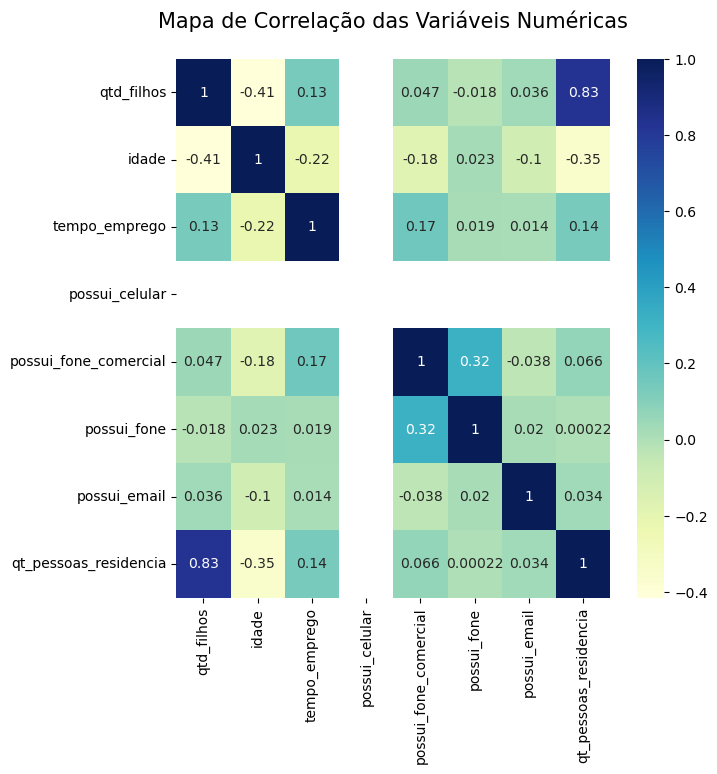

In [8]:
# Heatmap
plt.figure(figsize = (7,7))
sns.heatmap(df.select_dtypes('number').corr("spearman"), annot = True, cmap = "YlGnBu")
plt.title("Mapa de Correlação das Variáveis Numéricas\n", fontsize = 15)
plt.show()

<Figure size 640x480 with 0 Axes>

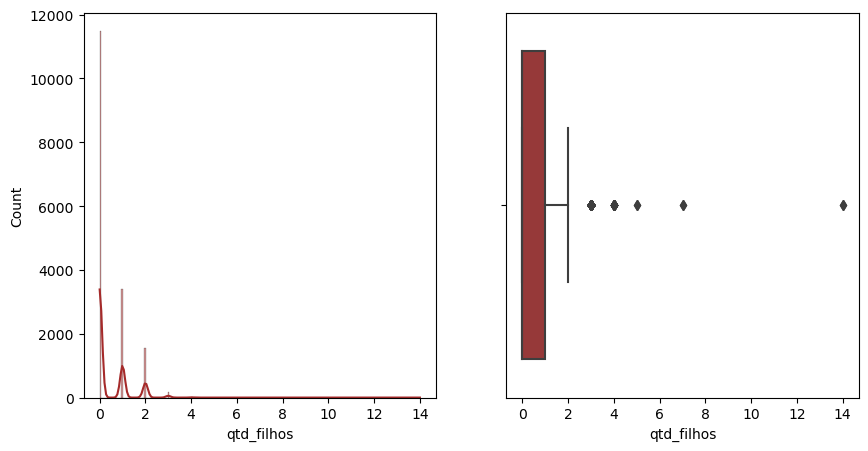

In [9]:
# Figura
plt.clf()
plt.figure(figsize = (10,5))
var = 'qtd_filhos'

# Subplots com histogramas
plt.subplot(121)
sns.histplot(data = df, x = var, kde = True, color = "brown")

# Subplots com boxplots
plt.subplot(122)
sns.boxplot(data = df, x = var, color = "brown", orient = 'horizontal')

plt.show()

<Figure size 640x480 with 0 Axes>

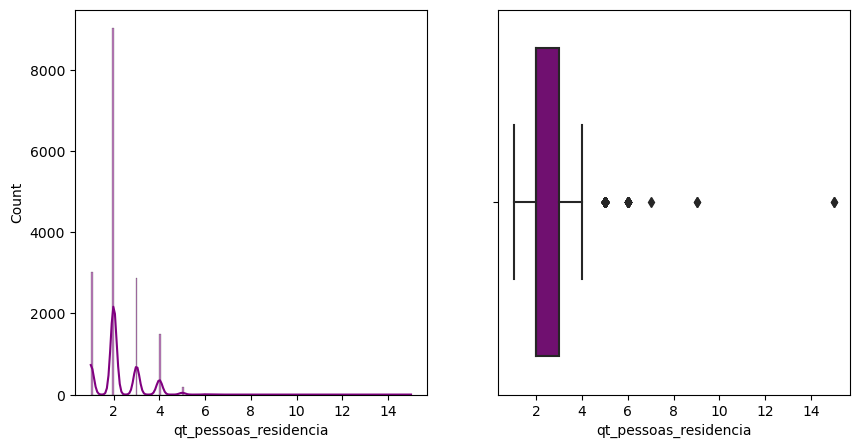

In [10]:
# Figura
plt.clf()
plt.figure(figsize = (10,5))
var = 'qt_pessoas_residencia'

# Subplots com histogramas
plt.subplot(121)
sns.histplot(data = df, x = var, kde = True, color = "purple")

# Subplots com boxplots
plt.subplot(122)
sns.boxplot(data = df, x = var, color = "purple", orient = 'horizontal')

plt.show()

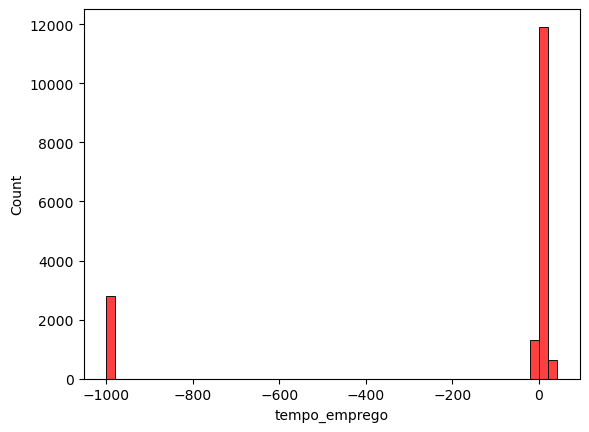

In [11]:
plt.clf()
var = "tempo_emprego"

sns.histplot(data = df, x = var, bins = 50, color= 'red')
plt.show()

In [12]:
# Alterando valores de -1000 pra -2, para visualizar melhor no gráfico
var = "tempo_emprego"
df.loc[df[var]<0,var] = -2

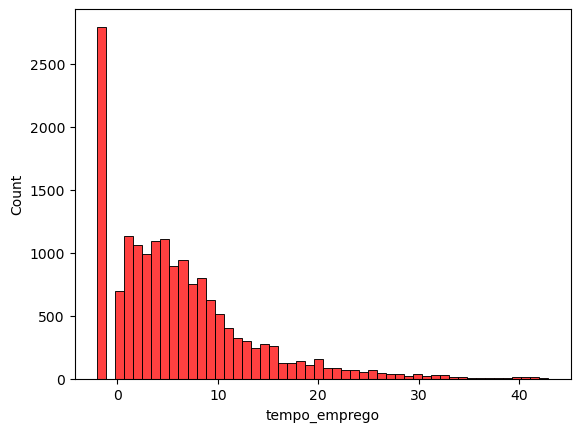

In [13]:
plt.clf()
var = "tempo_emprego"

sns.histplot(data = df, x = var, bins = 50, color= 'red')
plt.show()

In [14]:
# Descrevendo os dados não numéricos
df.describe(include = object)

,sexo,posse_de_veiculo,posse_de_imovel,tipo_renda,educacao,estado_civil,tipo_residencia
count,16650,16650,16650,16650,16650,16650,16650
unique,2,2,2,5,5,5,6
top,F,N,Y,Working,Secondary / secondary special,Married,House / apartment
freq,11201,10178,11176,8565,11245,11680,14974


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

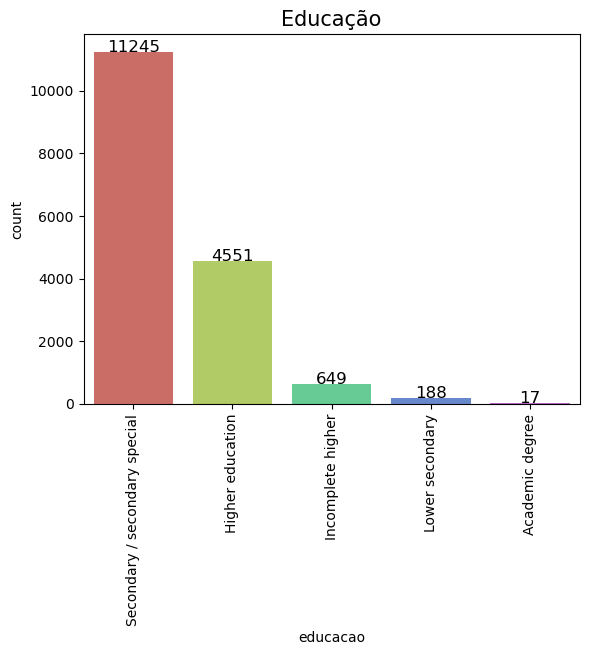

In [16]:
plt.clf()
ax = sns.countplot(data = df,  x = df['educacao'], palette = 'hls')
plt.title('Educação', fontsize = 15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 12)
    plt.xticks(rotation= 90)

plt.show()

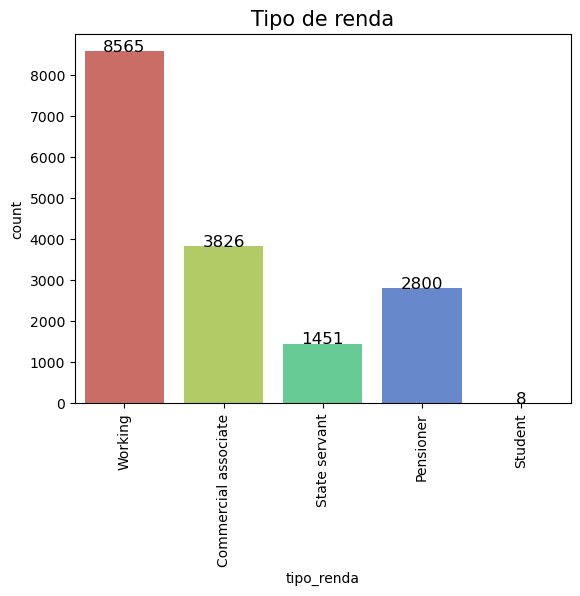

In [17]:
plt.clf()
ax = sns.countplot(data = df,  x = df['tipo_renda'], palette = 'hls')
plt.title('Tipo de renda', fontsize = 15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 12)
    plt.xticks(rotation= 90)

plt.show()

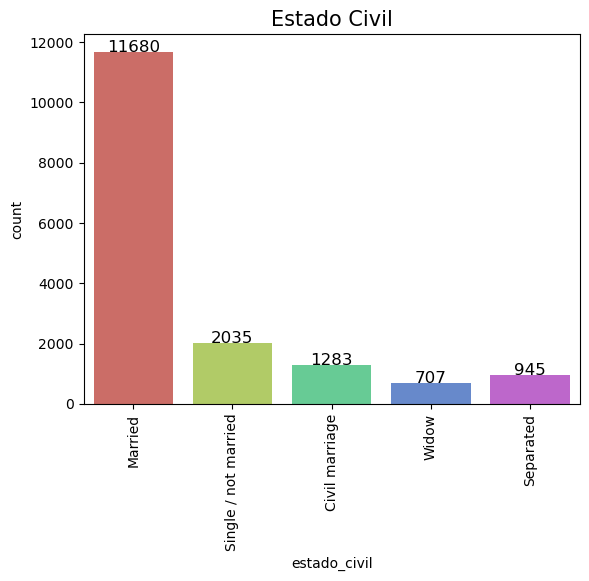

In [18]:
plt.clf()
ax = sns.countplot(data = df,  x = df['estado_civil'], palette = 'hls')
plt.title('Estado Civil', fontsize = 15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 12)
    plt.xticks(rotation= 90)

plt.show()

### Entendimento dos dados - Bivariadas

Entender a alteração da inadimplência indicada pela variável resposta (```AtrasoRelevante2anos```) e as variáveis explicativas (demais). Para isto, vamos calcular a taxa de inadimplentes (qtd inadimplentes / total) para diferentes grupos definidos pelas variáveis explicativas.


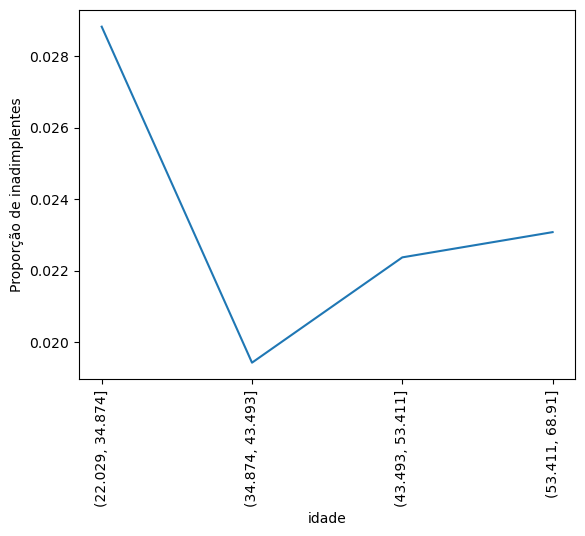

In [19]:
# Proporção de inadimplentes por faixa etária.

# Divide a coluna idade em 4 faixas
var = 'idade'
cat_srs, bins = pd.qcut(df[var], 4, retbins=True) ##
g = df.groupby(cat_srs) ###
biv = g['mau'].mean()##

ax = biv.plot.line()
ax.set_ylabel("Proporção de inadimplentes")
ticks = plt.xticks(range(len(biv.index.values)), biv.index.values, rotation = 90)

- Pessoas com idade entre 35 e 43 anos possuem uma tendência menor de se tornarem inadimplentes

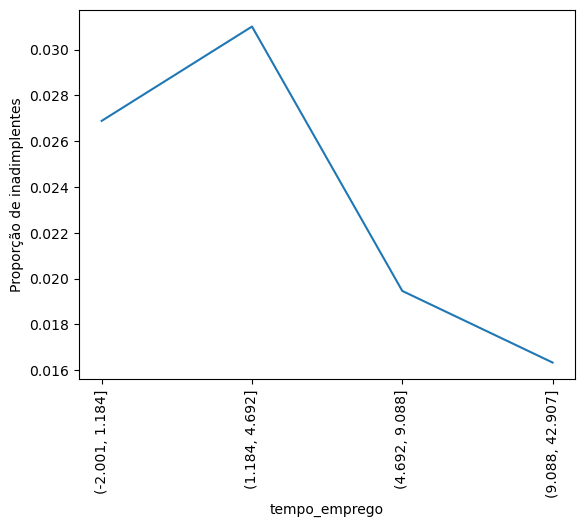

In [20]:
var = 'tempo_emprego'
cat_srs, bins = pd.qcut(df[var], 4, retbins=True)
g = df.groupby(cat_srs)
biv = g['mau'].mean()

ax = biv.plot.line()
ax.set_ylabel("Proporção de inadimplentes")
ticks = plt.xticks(range(len(biv.index.values)), biv.index.values, rotation = 90)

- Observamos que pessoas com menos tempo de emprego tem a tendência maior para inadimplência.

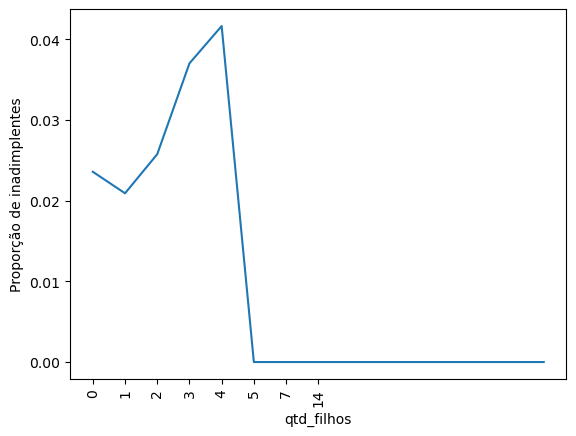

In [21]:
var = 'qtd_filhos'
x = df[var] 
g = df.groupby(x)
biv = g['mau'].mean()

ax = biv.plot.line()
ax.set_ylabel("Proporção de inadimplentes")
ticks = plt.xticks(range(len(biv.index.values)), biv.index.values, rotation = 90)

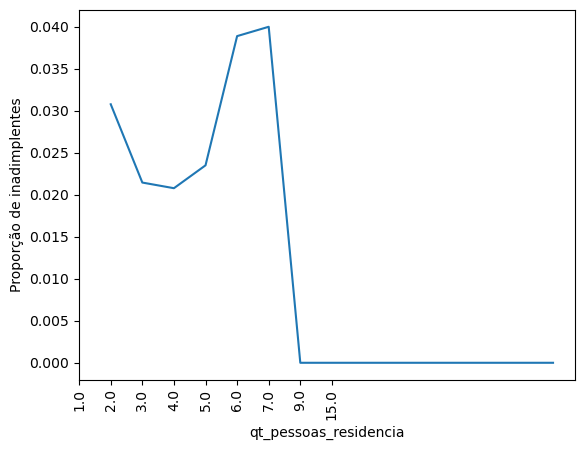

In [22]:
var = 'qt_pessoas_residencia'
x = df[var] 
g = df.groupby(x)
biv = g['mau'].mean()

ax = biv.plot.line()
ax.set_ylabel("Proporção de inadimplentes")
ticks = plt.xticks(range(len(biv.index.values)), biv.index.values, rotation = 90)

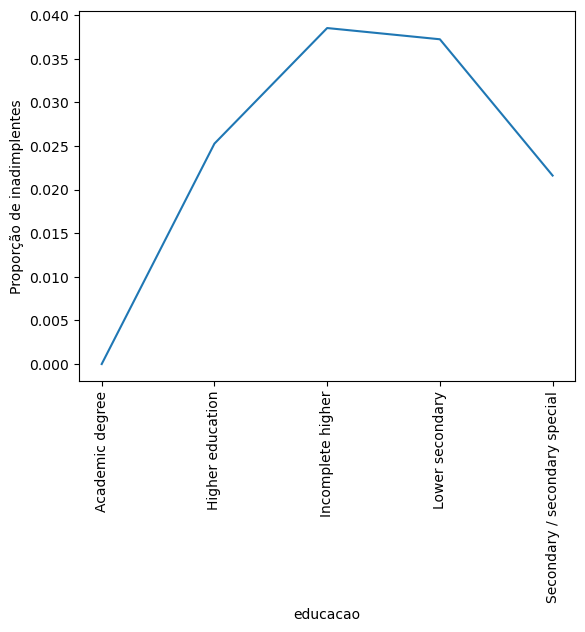

In [23]:
var = 'educacao'
x = df[var] 
g = df.groupby(x)
biv = g['mau'].mean()

ax = biv.plot.line()
ax.set_ylabel("Proporção de inadimplentes")
ticks = plt.xticks(range(len(biv.index.values)), biv.index.values, rotation = 90)

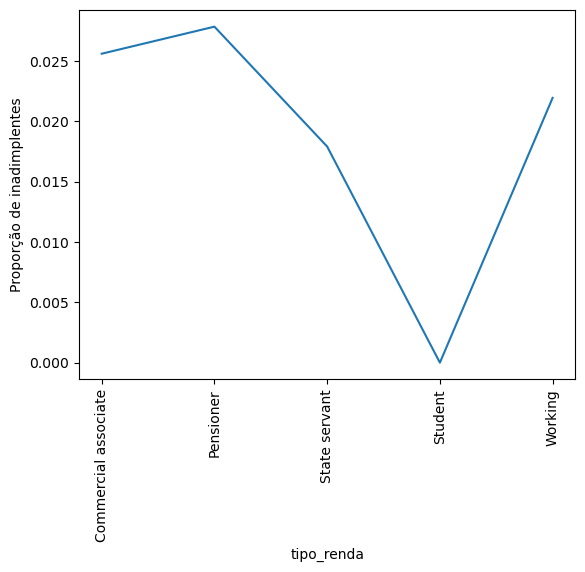

In [24]:
var = 'tipo_renda'
x = df[var] 
g = df.groupby(x)
biv = g['mau'].mean()

ax = biv.plot.line()
ax.set_ylabel("Proporção de inadimplentes")
ticks = plt.xticks(range(len(biv.index.values)), biv.index.values, rotation = 90)

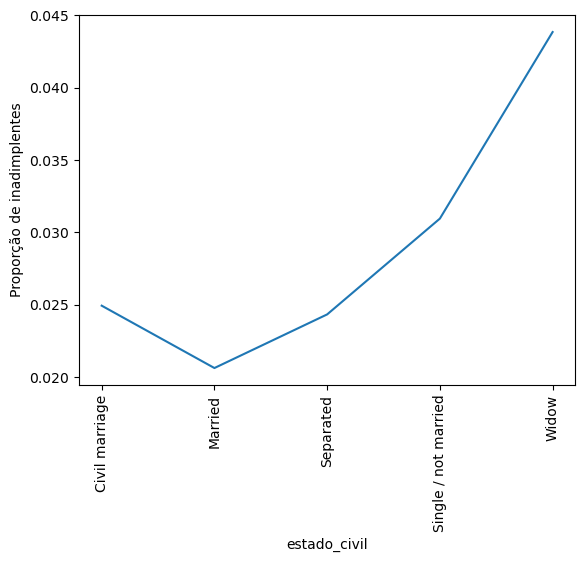

In [25]:
var = 'estado_civil'
x = df[var] 
g = df.groupby(x)
biv = g['mau'].mean()

ax = biv.plot.line()
ax.set_ylabel("Proporção de inadimplentes")
ticks = plt.xticks(range(len(biv.index.values)), biv.index.values, rotation = 90)

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

- seleção

Neste caso, os dados já estão pré-selecionados

- limpeza

Precisaremos identificar e tratar dados faltantes

- construção

Neste primeiro exercício não faremos construção de novas variáveis

- integração

Temos apenas uma fonte de dados, não é necessário agregação

- formatação

Os dados já se encontram em formatos úteis

Os dados já estão pré-selecionados, construídos e integrados, mas há dados faltantes que serão eliminados na próxima célula

In [26]:
# Monta um dataframe de metadados
metadata = pd.DataFrame(df.dtypes, columns = ['tipo'])

metadata['n_categorias'] = 0

for var in metadata.index:
    metadata.loc[var,'n_categorias'] = len(df.groupby([var]).size())
    
metadata

,tipo,n_categorias
sexo,object,2
posse_de_veiculo,object,2
posse_de_imovel,object,2
qtd_filhos,int64,8
tipo_renda,object,5
educacao,object,5
estado_civil,object,5
tipo_residencia,object,6
idade,float64,5298
tempo_emprego,float64,3005


In [27]:
# Função para converte variáveis categóricas em variáveis dummy
def convert_dummy(df, feature,rank=0):
    pos = pd.get_dummies(df[feature], prefix=feature)
    mode = df[feature].value_counts().index[rank]
    biggest = feature + '_' + str(mode)
    pos.drop([biggest],axis=1,inplace=True)
    df.drop([feature],axis=1,inplace=True)
    df=df.join(pos)
    return df

In [28]:
# Laço de repetição que percorre as váriaveis do nosso dataset e verifica se é categórica
for var in metadata[metadata['tipo'] == 'object'].index:
    df = convert_dummy(df, var)

In [29]:
df.head()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Lower secondary,estado_civil_Civil marriage,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,1,...,0,0,0,0,0,0,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1.0,False,0,...,0,0,0,1,0,0,0,0,0,0
2,0,52.356164,8.358904,1,0,1,1,1.0,False,0,...,0,0,0,1,0,0,0,0,0,0
3,0,46.224658,2.106849,1,1,1,1,2.0,False,1,...,0,0,0,0,0,0,0,0,0,0
4,0,29.230137,3.021918,1,0,0,0,2.0,False,0,...,0,0,0,0,0,0,0,0,0,0


## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:

- Selecionar a técnica de modelagem

Utilizaremos a técnica de floresta aleatória (**random forest**), pois é uma técnica bastante versátil e robusta que captura bem padrões complexos nos dados, relativamente fácil de se usar e que costuma produzir excelentes resultados para uma classificação como estas. Vamos ver esse algoritmo em detalhes mais adiante no curso, mas pense nele por enquanto como uma regra complexa baseada nas variáveis explicativas que classifica o indivíduo como inadimplente ou não. Mais adiante no curso vamos extrair mais dessa técnica.

- Desenho do teste

Antes de rodar o modelo precisamos construir um desenho do teste que será realizado. Para desenvolver um modelo como este, é considerado uma boa prática dividir a base em duas, uma chamada ```treinamento```, onde o algoritmo 'aprende', e outra chamada ```teste```, onde o algoritmo é avaliado. Essa prática fornece uma métrica de avaliação mais fidedigna do algoritmo, falaremos mais detalhes em lições futuras.

- Avaliação do modelo

Faremos a avaliação do nosso modelo através do percentual de acerto, avaliando a classificação do modelo (inadimplente e não inadimplente) e comparando com o estado real armazenado na variável resposta (```AtrasoRelevante2anos```). Esse percentual de acerto é frequentemente chamado de acurácia (**obs:** nunca usar assertividade... a**ss**ertivo não é aquele que a**c**erta, e sim "*adj.: em que o locutor declara algo, positivo ou negativo, do qual assume inteiramente a validade; declarativo*." a**C**ertivo está errado ;)
#### Dividindo a base em treino e teste



In [30]:
# Tira a variável resposta 'mau' (Atraso relevante de 2 anos) da base de treinamento
x = df.drop("mau",axis = 1)
y = df["mau"]

# Divide os dados em conjuntos de treinamento e teste.
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [31]:
x_train

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,sexo_M,posse_de_veiculo_Y,...,educacao_Lower secondary,estado_civil_Civil marriage,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
1064,1,28.509589,7.600000,1,0,0,1,3.0,0,0,...,0,0,0,0,0,0,0,0,0,0
15407,0,27.758904,3.035616,1,1,0,1,1.0,0,1,...,0,0,0,1,0,0,0,0,0,0
3577,1,56.605479,-2.000000,1,0,1,0,3.0,0,1,...,0,0,0,0,0,0,0,0,0,0
10947,0,44.917808,1.432877,1,0,0,0,2.0,0,0,...,0,1,0,0,0,0,0,0,0,0
12431,0,44.150685,2.698630,1,0,0,0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7205,0,45.690411,25.978082,1,0,0,0,1.0,0,0,...,0,0,0,1,0,0,0,0,0,0
11628,1,39.076712,6.994521,1,1,1,0,3.0,1,1,...,0,0,0,0,0,0,0,0,0,0
2528,0,37.983562,3.117808,1,0,0,0,2.0,0,1,...,0,0,0,0,0,0,0,0,0,0
6496,0,59.887671,-2.000000,1,0,0,0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Rodando o modelo
A função RandomForestClassifier gera a estrutura da floresta aleatória, e o parâmetro ```n_estimator``` define o número de árvores na floresta. Normalmente a acurácia do modelo tende a aumentar com o número de árvores, pelo menos até um certo limite - e aumenta também o recurso computacional demandado. Você pode alterar esse parâmetro e verificar se a acurácia do seu modelo melhora - não recomendamos valores muito altos. Vá alterando aos poucos e percebendo como o tempo aumenta com os seus recursos. Não é necessário ir muito além de umas 100 árvores.

#### Modelo com 3 árvores

In [32]:
clf = RandomForestClassifier(n_estimators=3)
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=3)

In [33]:
# Calculando a acurácia
y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Acurácia: {0:.2f}%'.format(acc*100))

Acurácia: 97.67%


In [34]:
# Matriz de confusão
tab = pd.crosstab(index = y_pred, columns = y_test)
print(tab[1][0]/(tab[1][0] + tab[0][0]))
print(tab[1][1]/(tab[1][1] + tab[0][1]))
tab

0.015818934047213434
0.4074074074074074


mau,False,True
row_0,,
False,4044,65
True,32,22


#### Modelo com 5 árvores

In [35]:
clf = RandomForestClassifier(n_estimators=5)
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=5)

In [36]:
# Calcula a acurácia
y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Acurácia: {0:.2f}%'.format(acc*100))

Acurácia: 97.77%


In [37]:
# Matriz de confusão
tab = pd.crosstab(index = y_pred, columns = y_test)
print(tab[1][0]/(tab[1][0] + tab[0][0]))
print(tab[1][1]/(tab[1][1] + tab[0][1]))
tab

0.01603888213851762
0.4375


mau,False,True
row_0,,
False,4049,66
True,27,21


#### Modelo com 10 árvores

In [38]:
clf = RandomForestClassifier(n_estimators=10)
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [39]:
# Calcula a acurácia
y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Acurácia: {0:.2f}%'.format(acc*100))

Acurácia: 97.62%


In [40]:
# Matriz de confusão
tab = pd.crosstab(index = y_pred, columns = y_test)
print(tab[1][0]/(tab[1][0] + tab[0][0]))
print(tab[1][1]/(tab[1][1] + tab[0][1]))
tab

0.016532944322878676
0.38


mau,False,True
row_0,,
False,4045,68
True,31,19


## Etapa 5 Crisp-DM: Avaliação dos resultados
Neste mini projeto, a nossa avaliação termina com a acurácia do melhor modelo. Futuramente aprofundaremos mais - a ideia geral é avaliar o impacto da utilização do modelo no negócio, ou seja, o quanto de melhora temos no resultado financeiro através do uso do modelo.

Exemplo: Considere que um cliente bom pagador deixa (em média) 5 '*dinheiros*' de lucro, e um mau pagador deixa (em média) 100 '*dinheiros*' de prejuízo.

De acordo com a matriz de confusão do nosso melhor modelo (com 5 árvores):

| Decisão   | lucro dos bons    | lucro dos maus | total  |
| --------- |:-----------------:|:--------------:| ------:|
| Aprovador | 4049 x 5          | 66 x (-100)    | 13.645 |
| Reprovar  |  27 x 5           | 21 x (-100)    | -1.965 |

Podemos observar que estariamos evitando, portanto, um prejuízo de -2.145 '*dinheiros*' - o que na prática significa um aumento no lucro.

## Etapa 6 Crisp-DM: Implantação
Essa é a etapa onde colocamos o modelo desenvolvido em uso. ormalmente Geralmente implementamos o modelo desenvolvido em um motor de crédito que toma as decisões com algum nível de automação - tipicamente aprovando automaticamente clientes muito bons, negando automaticamente clientes muito ruins, e enviando os intermediários para análise manual.